In [67]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
fcd = pd.read_csv('./kaggle/covtype.csv')

In [69]:
fcd.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [70]:
fcd.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
340847,2590,313,18,330,103,854,169,224,193,1100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
340848,2595,310,16,300,108,845,176,228,191,1095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
340849,2603,308,13,270,116,836,184,232,188,1090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
340850,2608,340,6,240,121,825,208,232,162,1087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
340851,2607,87,8,210,120,808,232,227,127,1084,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
fcd.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,340852.000000,340852.000000,340852.000000,340852.000000,340852.000000,340852.000000,340852.000000,340852.000000,340852.000000,340852.000000,...,340851.000000,340851.000000,340851.000000,340851.000000,340851.000000,340851.000000,340851.000000,340851.000000,340851.000000,340851.000000
mean,2889.928294,149.965413,13.521634,239.427846,40.084119,2669.167709,212.581569,222.006451,141.140313,2203.721319,...,0.049438,0.033633,0.000575,0.000308,0.000029,0.000100,0.017935,0.019352,0.009201,2.077943
std,281.089436,113.726033,7.676630,182.816873,50.387169,1775.843759,27.274388,19.408312,37.557503,1509.975679,...,0.216781,0.180284,0.023973,0.017549,0.005416,0.009987,0.132714,0.137758,0.095477,1.246741
min,1859.000000,0.000000,0.000000,0.000000,-159.000000,0.000000,0.000000,30.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2758.000000,54.000000,8.000000,95.000000,6.000000,1116.000000,200.000000,213.000000,119.000000,1075.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2941.000000,112.000000,12.000000,201.000000,26.000000,2313.000000,219.000000,225.000000,141.000000,1884.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3071.000000,263.000000,18.000000,342.000000,59.000000,4148.000000,232.000000,235.000000,165.000000,2812.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3849.000000,360.000000,64.000000,1343.000000,601.000000,7117.000000,254.000000,254.000000,251.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [72]:
fcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340852 entries, 0 to 340851
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           340852 non-null  int64  
 1   Aspect                              340852 non-null  int64  
 2   Slope                               340852 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    340852 non-null  int64  
 4   Vertical_Distance_To_Hydrology      340852 non-null  int64  
 5   Horizontal_Distance_To_Roadways     340852 non-null  int64  
 6   Hillshade_9am                       340852 non-null  int64  
 7   Hillshade_Noon                      340852 non-null  int64  
 8   Hillshade_3pm                       340852 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  340852 non-null  int64  
 10  Wilderness_Area1                    340852 non-null  int64  
 11  Wilderness_Area2          

In [73]:
fcd.shape

(340852, 55)

In [74]:
print(fcd.isnull().sum())

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           1
Soil_Type11                           1


In [75]:
print(fcd.isna().sum())

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           1
Soil_Type11                           1


In [76]:
print(fcd.duplicated().sum())

0


In [77]:
target_col = fcd.columns[-1]
fcd[target_col].value_counts().sort_index()

,count
Cover_Type,
1.0,99951
2.0,190340
3.0,22774
4.0,2747
5.0,7346
6.0,12253
7.0,5440


In [78]:
fcd.isna().mean()*100

,0
Elevation,0.000000
Aspect,0.000000
Slope,0.000000
Horizontal_Distance_To_Hydrology,0.000000
Vertical_Distance_To_Hydrology,0.000000
Horizontal_Distance_To_Roadways,0.000000
Hillshade_9am,0.000000
Hillshade_Noon,0.000000
Hillshade_3pm,0.000000
Horizontal_Distance_To_Fire_Points,0.000000


In [79]:
fcd.dropna(inplace=True)

In [80]:
X = fcd.drop(columns=[target_col])
y = fcd[target_col]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [82]:
numeric_cols = X.select_dtypes(include=[np.number]).columns[:10]
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [83]:
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [84]:
lr = LogisticRegression(max_iter=1000, n_jobs=-1, multi_class='multinomial')
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("LR Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR Accuracy: 0.7504217335817283
              precision    recall  f1-score   support

         1.0       0.72      0.63      0.67     19990
         2.0       0.78      0.88      0.83     38069
         3.0       0.66      0.85      0.75      4555
         4.0       0.60      0.41      0.48       549
         5.0       0.19      0.02      0.03      1469
         6.0       0.55      0.27      0.36      2451
         7.0       0.86      0.42      0.57      1088

    accuracy                           0.75     68171
   macro avg       0.62      0.50      0.53     68171
weighted avg       0.73      0.75      0.73     68171



In [85]:
rf = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)  # tree-based — use unscaled or scaled both okay
y_pred_rf = rf.predict(X_test)
print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

RF Accuracy: 0.95106423552537
              precision    recall  f1-score   support

         1.0       0.96      0.92      0.94     19990
         2.0       0.95      0.98      0.96     38069
         3.0       0.94      0.97      0.95      4555
         4.0       0.91      0.86      0.88       549
         5.0       0.94      0.80      0.87      1469
         6.0       0.95      0.90      0.92      2451
         7.0       0.97      0.92      0.94      1088

    accuracy                           0.95     68171
   macro avg       0.94      0.91      0.92     68171
weighted avg       0.95      0.95      0.95     68171



In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [89]:
xgb = XGBClassifier(n_estimators=200,use_label_encoder=False,eval_metric='mlogloss',random_state=42,n_jobs=8)
xgb.fit(X_train, y_train_enc)
y_pred_xgb = xgb.predict(X_test)

# Convert predictions back to original labels (1–7)
y_pred_xgb = le.inverse_transform(y_pred_xgb)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:44:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [90]:
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9310703965029118
              precision    recall  f1-score   support

         1.0       0.93      0.87      0.90     19990
         2.0       0.93      0.96      0.95     38069
         3.0       0.95      0.96      0.96      4555
         4.0       0.90      0.87      0.89       549
         5.0       0.91      0.84      0.88      1469
         6.0       0.93      0.92      0.93      2451
         7.0       0.96      0.94      0.95      1088

    accuracy                           0.93     68171
   macro avg       0.93      0.91      0.92     68171
weighted avg       0.93      0.93      0.93     68171



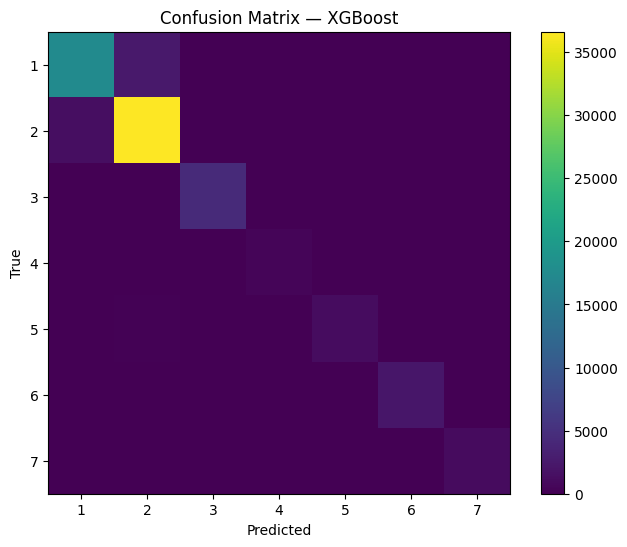

In [91]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix — XGBoost")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.xticks(np.arange(7), np.arange(1,8))
plt.yticks(np.arange(7), np.arange(1,8))
plt.show()

In [92]:
fi = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
print(fi.head(20))

Wilderness_Area4                      0.504779
Wilderness_Area1                      0.042335
Elevation                             0.040369
Soil_Type12                           0.029839
Soil_Type3                            0.027290
Soil_Type22                           0.022995
Soil_Type23                           0.021863
Soil_Type29                           0.021010
Soil_Type2                            0.018603
Wilderness_Area3                      0.018311
Soil_Type30                           0.016885
Soil_Type4                            0.012608
Soil_Type31                           0.010582
Soil_Type39                           0.010564
Soil_Type13                           0.010470
Soil_Type38                           0.010292
Soil_Type8                            0.009923
Soil_Type9                            0.009755
Soil_Type18                           0.009106
Horizontal_Distance_To_Fire_Points    0.008982
dtype: float32


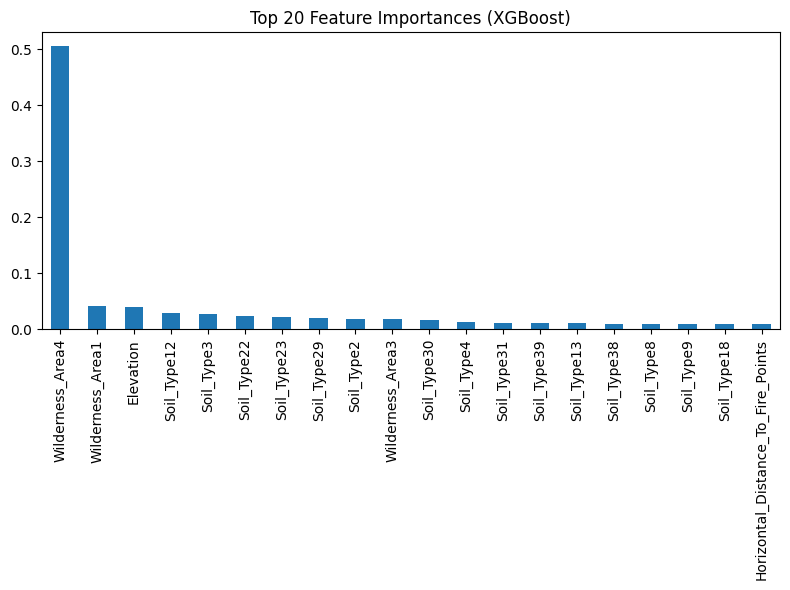

In [93]:
plt.figure(figsize=(8,6))
fi.head(20).plot(kind='bar')
plt.title("Top 20 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()